In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Question 03 - Distribution of retirees' pensions and rental costs (housing, garden, etc.) by year in a cumulative chart.

To solve this question, we need to first define the retiree. By definition, a retiree is a person that is older than 65 years old. The information about the age of people can be found in {U,R}{year}P1 files.

In [5]:
from typing import List

BASE_PATH = '../datasets/'
RETIREMENT_AGE = 65
AREA_TYPES = ['U', 'R']


def extract_retirees(years: List[str]):
    result = {}

    for year in years:
        result[year] = {}

        for area_type in AREA_TYPES:
            P1 = pd.read_excel(f"{BASE_PATH}{area_type}{year}.xlsx", sheet_name=f"{area_type}{year}P1")
            P4S03 = pd.read_excel(f"{BASE_PATH}{area_type}{year}.xlsx", sheet_name=f"{area_type}{year}P4S03")
            P3S04 = pd.read_excel(f"{BASE_PATH}{area_type}{year}.xlsx", sheet_name=f"{area_type}{year}P3S04")
    
            if not P4S03['income_pension'].dtype in ['int32', 'int64', 'float32', 'float64']:
                P4S03['income_pension'] = pd.to_numeric(
                    P4S03['income_pension'], errors='coerce', downcast='unsigned'
                )
    
            P4S03_with_pension = P4S03[P4S03['income_pension'] > 0]
            P1_old = P1[P1['age'] > RETIREMENT_AGE]
    
            retirees = pd.merge(left=P4S03_with_pension, right=P1_old, on=['Address'], how='inner')
    
            P3S04['code'] = pd.to_numeric(P3S04['code'], errors='coerce', downcast='unsigned')
            rents = P3S04[P3S04['code'].isin([41111, 41112, 41113])]
    
            retirees_who_pay_rent_for_this_year = pd.merge(retirees, rents, on=['Address'], how='inner')
            
            result[year]['urban' if area_type == 'U' else 'rural'] = retirees_who_pay_rent_for_this_year
    
    return result


years = ['98', '99', '1400', '1401']

retirees_who_pay_rent = extract_retirees(years)

(64735, 10)
(26783, 11)
(3413, 20)
(177, 24)
(61743, 10)
(26941, 11)
(1874, 20)
(18, 24)


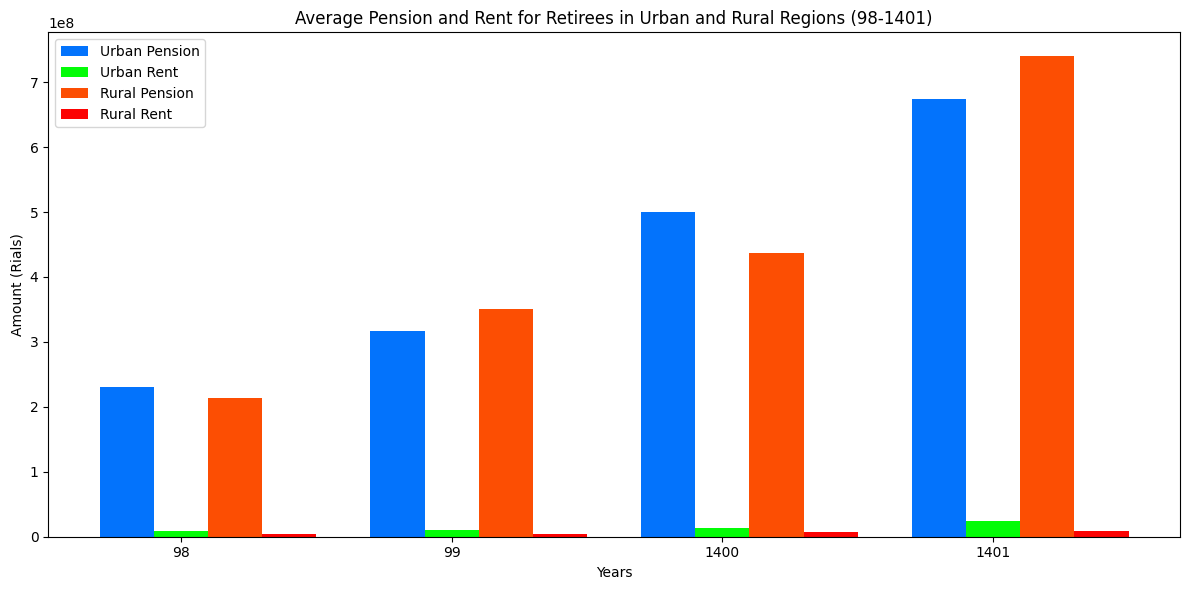

In [6]:
average_pensions_U = [
    retirees_who_pay_rent[str(year)]['urban']['income_pension'].mean()
    for year in years
]
average_rents_U = [
    retirees_who_pay_rent[str(year)]['urban']['value'].mean()
    for year in years
]
average_pensions_R = [
    retirees_who_pay_rent[str(year)]['rural']['income_pension'].mean()
    for year in years
]
average_rents_R = [
    retirees_who_pay_rent[str(year)]['rural']['value'].mean()
    for year in years
]

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(years))

ax.bar(index - bar_width, average_pensions_U, bar_width, label='Urban Pension', color='#0373fc')
ax.bar(index, average_rents_U, bar_width, label='Urban Rent', color='#03fc07')

ax.bar(index + bar_width, average_pensions_R, bar_width, label='Rural Pension', color='#fc4e03')
ax.bar(index + 2 * bar_width, average_rents_R, bar_width, label='Rural Rent', color='#fc0303')

ax.set_xlabel('Years')
ax.set_ylabel('Amount (Rials)')
ax.set_title('Average Pension and Rent for Retirees in Urban and Rural Regions (98-1401)')
ax.set_xticks(index)
ax.set_xticklabels(years)
ax.legend()

plt.tight_layout()
plt.show()